In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.describe()

In [ ]:
description = df.describe().round(1)
description

### Histograms

In [ ]:
df.hist(bins=30, figsize=(15, 10), color='steelblue', edgecolor='k');

### Boxplot Analysis

In [ ]:
def detect_outliers(data, feature=None):
    q1 = data.feature.quantile(0.25)
    q3 = data.feature.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data.query(f'{feature} < @lower_bound | {feature} > @upper_bound')
    return outliers

feature = "Insert your feature name here"
outliers = df.groupby('feature1','faeture2').apply(detect_outliers, feature=feature).reset_index(drop=True)

df_size = df.groupby(['feature1','feature2']).size()
outliers_size = outliers.groupby(['feature1','feature2']).size()
outlier_percentage = df_size / outliers_size * 100
print("Outlier percentage: ",outlier_percentage)

In [ ]:
# reset_index() to have 'feature1' and 'feature2' as columns rather than indices
outlier_percentage = outlier_percentage.reset_index(name='Percentage')

In [ ]:
#Visualize the outliers
plt
barplot = sns.barplot(x='feature1', y='Percentage', hue='feature2', data=outlier_percentage)
plt.axhline(100, color='k', ls='--')
for patch in barplot.patches:
    barplot.annotate(format(patch.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     xytext=(0,9),
                     textcoords='offset points')
plt.title('Outlier percentage per feature1 and feature2')
plt.show()

### Scatter Plot

In [3]:
# Create a random dataset
X = np.array([0.5, 1., 2., 3., 4., 5., 6.])
y = np.array([0.2, 0.6, 0.9, 1.5, 3.0, 5.0, 8.0])

In [4]:
# Reshape X so that it becomes a column vector
X = X[:, np.newaxis]

In [5]:
# Model-1: Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

In [6]:
# Model-2: Polynomical Regression
poly_feat = PolynomialFeatures(degree=2) # degree=2 means that we are creating a quadratic polynomial
X_poly = poly_feat.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

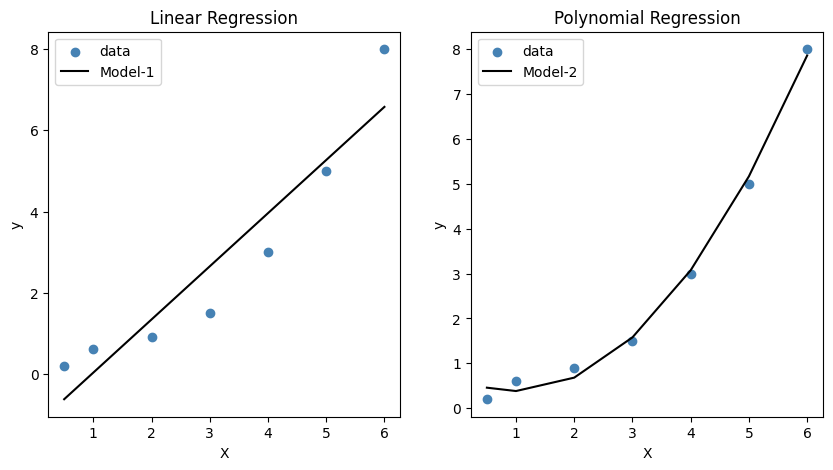

In [7]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#Model-1 results
ax[0].scatter(X, y, color='steelblue', label='data')
ax[0].plot(X, y_pred_lin, color='k', label='Model-1')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].set_title('Linear Regression')
ax[0].legend(loc='best')

#Model-2 results
sorted_order = np.argsort(X.squeeze())
X_sorted = X[sorted_order]
y_pred_poly_sorted = y_pred_poly[sorted_order]

ax[1].scatter(X, y, color='steelblue', label='data')
ax[1].plot(X_sorted, y_pred_poly_sorted, color='k', label='Model-2')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].set_title('Polynomial Regression')
ax[1].legend(loc='best')

plt.show()

In [8]:
#R2 values
print("R2 score of Model-1 (Linear Regression): ", r2_score(y, y_pred_lin))
print("R2 score of Model-2 (Polynomial Regression): ", r2_score(y, y_pred_poly))

R2 score of Model-1 (Linear Regression):  0.8866220249276525
R2 score of Model-2 (Polynomial Regression):  0.9954748980220572


#### What if there are more than two variables?

In [21]:
data = datasets.load_iris(return_X_y=True, as_frame=True)
data = pd.concat([data[0], data[1]], axis=1)

In [23]:
X = data.drop('target', axis=1)
y = data['target']

In [25]:
X = sm.add_constant(X) # add a constant to the model
model = sm.OLS(y, X).fit() # fit the model using OLS (ordinary least squares) method
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           8.46e-83
Time:                        23:28:39   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1865      0.20